In [1]:
# Load modules for data accessing and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load NLP modules
import re
import sys
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams

In [3]:
# construct dataframe for train...
df_train = pd.read_csv('../../data/dataset/csv/review.csv', index_col = 'review_id')

In [4]:
#####################
## Preprocess data ##
#####################
#token_pattern = "[a-zA-Z'`]+"
token_pattern = "[a-zA-Z0-9'`]+"
#token_pattern = r"(?u)\b\w\w+\b"
def TextPreProcessing(line,
                      token_pattern=token_pattern):
    ## tokenize
    tokenizer = RegexpTokenizer(token_pattern)
    tokens = tokenizer.tokenize( str(line).lower() )
    return tokens

def Myngrams(text, nfold):
    s = []
    for ngram in ngrams(text, nfold):
        s.append(' '.join(str(i) for i in ngram))

    #s = list(set(s)) # unique string in the list
    return s

#print(Myngrams(TextPreProcessing('This is a token. This is a sentence. We are data scientists!', token_pattern), 2))

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

def TryDivide(x, y, val=0.0):
    """ 
    Try to divide two numbers
    """
    if y != 0.0:
        val = float(x) / y
    return val

def GetPositionList(tgt, obs):
    """
    Get the list of positions of obs in target
    """
    pos_of_obs_in_tgt = [0]
    if len(obs) != 0:
        pos_of_obs_in_tgt = [j for j,w in enumerate(obs, start=1) if w in tgt]
        if len(pos_of_obs_in_tgt) == 0:
            pos_of_obs_in_tgt = [0]
    #print(pos_of_obs_in_tgt)
    return pos_of_obs_in_tgt

def DumpTextBasicNgram(df):
    ## 1-gram
    print("Generate 1-gram...")
    df["text_1gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 1), axis=1))
    ## 2-gram
    print("Generate 2-gram...")
    df["text_2gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 2), axis=1))
    ## 3-gram
    print("Generate 3-gram...")
    df["text_3gram"] = list(df.apply(lambda x: Myngrams(TextPreProcessing(x["text"]), 3), axis=1))

    return ;
    
def DumpTextCountFeatures(df):
    ################################
    ## text count and digit count ##
    ################################
    print("Generate basic text count features...")
    fnames = ["text"]
    ngrams = ["1gram", "2gram", "3gram"]
    CountDigit = lambda x: sum([1. for w in x if w.isdigit()])
    
    for fname in fnames:
        for ngram in ngrams:
            ## word count
            df["Count_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: len(x[fname + "_" + ngram]), axis=1))
            df["CountUnique_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: len(set(x[fname + "_" + ngram])), axis=1))
            df["RatioUnique_%s_%s"%(fname, ngram)] = list(df.apply(lambda x: TryDivide(x["CountUnique_%s_%s"%(fname, ngram)], x["Count_%s_%s"%(fname, ngram)]), axis=1))
        ## digit count
        df["CountDigit_%s"%fname] = list(df.apply(lambda x: CountDigit(x[fname + "_1gram"]), axis=1))
        df["RatioDigit_%s"%fname] = list(df.apply(lambda x: TryDivide(x["CountDigit_%s"%fname], x["Count_%s_1gram"%(fname)]), axis=1))
    '''
    ## description missing indicator
    #df["description_missing"] = list(df.apply(lambda x: int(x["description_unigram"] == ""), axis=1))
    '''

    df.drop(['text_1gram', 'text_2gram', 'text_3gram'], axis=1, inplace=True)
    
    return

import sklearn.utils
sub_df_train = sklearn.utils.shuffle(df_train).iloc[:10000, :]
DumpTextBasicNgram(sub_df_train)
DumpTextCountFeatures(sub_df_train)
sub_df_train.head()

Generate 1-gram...
Generate 2-gram...
Generate 3-gram...
Generate basic text count features...


,useful,date,text,stars,business_id,user_id,cool,funny,Count_text_1gram,CountUnique_text_1gram,RatioUnique_text_1gram,Count_text_2gram,CountUnique_text_2gram,RatioUnique_text_2gram,Count_text_3gram,CountUnique_text_3gram,RatioUnique_text_3gram,CountDigit_text,RatioDigit_text
review_id,,,,,,,,,,,,,,,,,,,
PVaE7iImNxK6QtnWkIVt0A,2,2012-09-15,***The best the best the best!!!!! \n\nI have ...,5,rhKzcgMm8CDhu7RZz_XxqQ,cSO1H4h6sP2ELIE4uVmtPA,2,0,137,87,0.635036,136,129,0.948529,135,133,0.985185,1.0,0.007299
8TBYeJBHf22BjT-nECIw2A,0,2015-01-02,I was visiting Scottsdale while on a road-trip...,5,a2ZBDIXmwBm7IWnXR6LK-g,EbMnnfX1hlwAn9IodD8VUQ,0,0,208,124,0.596154,207,198,0.956522,206,206,1.000000,0.0,0.000000
MGhFKxZ-vFe7j_LEkJ-t5A,0,2017-09-20,Getting in an accident can be pretty rough and...,5,4jNCrr2WEQpUUAQcC_HnqA,Y288FRu0jzKt5hO4rH9xiw,0,0,87,63,0.724138,86,83,0.965116,85,84,0.988235,0.0,0.000000
u3fnJLo7RnTvdgiTHjLD-g,0,2016-10-08,So \n1.waited a long time\n2.got my food wrong...,1,oUdmQBw8RZER1gf18xpTPw,X24yzyBufaSiU6DuPnAAcQ,1,2,68,54,0.794118,67,66,0.985075,66,66,1.000000,4.0,0.058824
9HiBN2PSxaQsLjfc3OMg6A,3,2016-07-29,It has become the most dreaded drive thru of a...,1,szL4LjaGZpmsLjQ5ALmaQA,ZX5uTYIIzwsJHhcAPscrTg,0,0,118,95,0.805085,117,116,0.991453,116,116,1.000000,3.0,0.025424


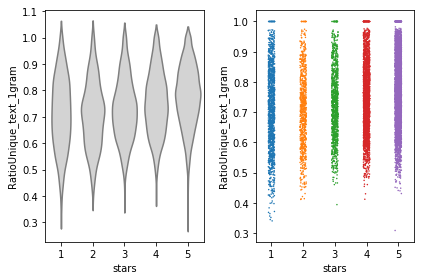

In [6]:
# stars vs 1gram
# violin plot
plt.subplot(1,2,1)
sns.violinplot(x='stars', y='RatioUnique_text_1gram', data=sub_df_train, inner=None, color='lightgray')

# strip plot
plt.subplot(1,2,2)
sns.stripplot(x='stars', y='RatioUnique_text_1gram', data=sub_df_train, jitter=True, size=1.5)

# Display the plot
plt.tight_layout()
plt.show()